In [254]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [304]:
#import and format generation per capita data
generation_file = 'data/generation.csv'
gen_df = pd.read_csv(generation_file)
gen_df = gen_df.dropna()
gen_df=gen_df.rename(columns = {'Year':'Year', 'Total North America':'North America', 'Total S. & Cent. America':'South/Cent America', 
                                'Total Europe':'Europe', 'Total CIS':'CIS', 
                                'Total Middle East':'Middle East', 'Total Africa':'Africa', 
                                'Total Asia Pacific':'Asia Pacific', 'Total World':'World'})
#gen_df.head()

In [302]:
#import and format green data
green_file = 'data/green.csv'
green_df = pd.read_csv(green_file)
#green_df.set_index('Region')
green_df = green_df.drop(['Change 2018', '1990-2018','Change Oil',
 'Change Natural Gas',
 'Change Coal',
 'Change Nuclear energy',
 'Change Hydro electric',
 'Change Renewables'], axis=1)
list(green_df)
#df.drop(['Cochice', 'Pima'])
#green_df.drop(green_df.index[7])
green_df = green_df[green_df.Region != "Total World"]
green_df=green_df.rename(columns = {'Region':'Region','2018 Oil':'Oil','2018 Natural Gas':'Natural Gas',
                                '2018 Coal':'Coal','2018 Nuclear energy':'Nuclear Energy',
                                '2018 Hydro electric':'Hydro','2018 Renewables':'Renewables'})
#green_df.head()

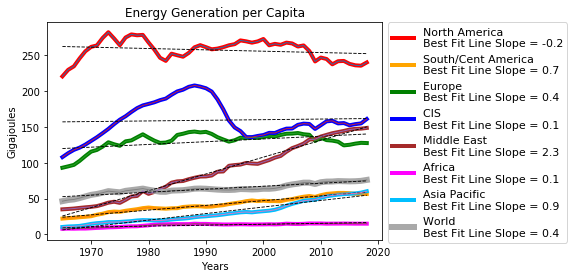

In [300]:
#Plot energy consumption per capita of regions
plt.plot(gen_df["Year"],gen_df["North America"],color="red",linewidth=4,label="North America")
plt.plot(gen_df["Year"],gen_df["South/Cent America"],color="orange",linewidth=4,label="South/Cent America")
plt.plot(gen_df["Year"],gen_df["Europe"],color="green",linewidth=4,label="Europe")
plt.plot(gen_df["Year"],gen_df["CIS"],color="blue",linewidth=4,label="Commonwealth of Independent States")
plt.plot(gen_df["Year"],gen_df["Middle East"],color="brown",linewidth=4,label="Middle East")
plt.plot(gen_df["Year"],gen_df["Africa"],color="fuchsia",linewidth=4,label ="Africa")
plt.plot(gen_df["Year"],gen_df["Asia Pacific"],color="deepskyblue",linewidth=4,label="Asia Pacific")
plt.plot(gen_df["Year"],gen_df["World"],color="darkgray",linewidth=6,label="World")
plt.title("Energy Generation per Capita")
plt.xlabel("Years")
plt.ylabel("Gigajoules")
#plt.legend(bbox_to_anchor=(1, 1.025))
#plt.tight_layout
#plt.savefig("Regional Energy Gen Over Time.png",bbox_inches = 'tight')

#Plot regression lines and capture slope
fit_NA = np.polyfit(gen_df["Year"],gen_df["North America"],1)
fit_fn_NA = np.poly1d(fit_NA) 
plt.plot(gen_df["Year"],gen_df["North America"], gen_df["Year"], fit_fn_NA(gen_df["Year"]),'--k',linewidth=.9)
slope_NA = round(fit_NA[0],1)

fit_SCA = np.polyfit(gen_df["Year"],gen_df["South/Cent America"],1)
fit_fn_SCA = np.poly1d(fit_SCA) 
plt.plot(gen_df["Year"],gen_df["South/Cent America"], gen_df["Year"], fit_fn_SCA(gen_df["Year"]),'--k',linewidth=.9)
slope_SCA = round(fit_SCA[0],1)

fit_E = np.polyfit(gen_df["Year"],gen_df["Europe"],1)
fit_fn_E = np.poly1d(fit_E) 
plt.plot(gen_df["Year"],gen_df["Europe"], gen_df["Year"], fit_fn_E(gen_df["Year"]),'--k',linewidth=.9)
slope_E = round(fit_E[0],1)

fit_CIS = np.polyfit(gen_df["Year"],gen_df["CIS"],1)
fit_fn_CIS = np.poly1d(fit_CIS) 
plt.plot(gen_df["Year"],gen_df["CIS"], gen_df["Year"], fit_fn_CIS(gen_df["Year"]),'--k',linewidth=.9)
slope_CIS = round(fit_CIS[0],1)

fit_ME = np.polyfit(gen_df["Year"],gen_df["Middle East"],1)
fit_fn_ME = np.poly1d(fit_ME) 
plt.plot(gen_df["Year"],gen_df["Middle East"], gen_df["Year"], fit_fn_ME(gen_df["Year"]),'--k',linewidth=.9)
slope_ME = round(fit_ME[0],1)

fit_A = np.polyfit(gen_df["Year"],gen_df["Africa"],1)
fit_fn_A = np.poly1d(fit_A) 
plt.plot(gen_df["Year"],gen_df["Africa"], gen_df["Year"], fit_fn_A(gen_df["Year"]),'--k',linewidth=.9)
slope_A = round(fit_A[0],1)

fit_AP = np.polyfit(gen_df["Year"],gen_df["Asia Pacific"],1)
fit_fn_AP = np.poly1d(fit_AP) 
plt.plot(gen_df["Year"],gen_df["Asia Pacific"], gen_df["Year"], fit_fn_AP(gen_df["Year"]),'--k',linewidth=.9)
slope_AP = round(fit_AP[0],1)

fit_W = np.polyfit(gen_df["Year"],gen_df["World"],1)
fit_fn_W = np.poly1d(fit_W) 
plt.plot(gen_df["Year"],gen_df["World"], gen_df["Year"], fit_fn_W(gen_df["Year"]),'--k',linewidth=.9)
slope_W = round(fit_W[0],1)

plt.legend(('North America \nBest Fit Line Slope = ' + str(slope_NA),
            'South/Cent America \nBest Fit Line Slope = ' + str(slope_SCA),
            'Europe \nBest Fit Line Slope = ' + str(slope_E),
            'CIS \nBest Fit Line Slope = ' + str(slope_CIS),
            'Middle East \nBest Fit Line Slope = ' + str(slope_ME),
            'Africa \nBest Fit Line Slope = ' + str(slope_A),
            'Asia Pacific \nBest Fit Line Slope = ' + str(slope_AP),
            'World \nBest Fit Line Slope = ' + str(slope_W)),bbox_to_anchor=(1, 1.025),fontsize=11)
plt.tight_layout
plt.savefig("output/Regional Energy Gen Over Time.png",bbox_inches = 'tight')


In [305]:
#Create DataFrame with slopes
countries = ['North America','South/Cent America','Europe','CIS','Middle East',
                                 'Africa','Asia Pacific','World']     
slopes = [slope_NA,slope_SCA,slope_E,slope_CIS,slope_ME,slope_A,slope_AP,slope_W]

slope_df = pd.DataFrame()
slope_df['Country']  = countries
slope_df['Slope'] = slopes
slope_df

,Country,Slope
0,North America,-0.2
1,South/Cent America,0.7
2,Europe,0.4
3,CIS,0.1
4,Middle East,2.3
5,Africa,0.1
6,Asia Pacific,0.9
7,World,0.4


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

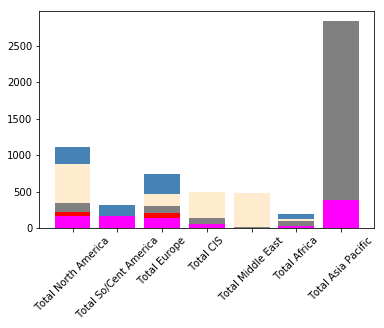

In [260]:
#Plot stacked bar chart of fuel sources
oil=green_df["Oil"]
gas=green_df["Natural Gas"]
coal=green_df["Coal"]
nuclear=green_df["Nuclear Energy"]
hydro=green_df["Hydro"]
renewable=green_df["Renewables"]

plt.bar(green_df["Region"],oil,color="steelblue")
plt.bar(green_df["Region"],gas, color="blanchedalmond")
plt.bar(green_df["Region"],coal, color="gray")
plt.bar(green_df["Region"],nuclear,color="red")
plt.bar(green_df["Region"],hydro,color="fuchsia")

plt.xticks(rotation=45)

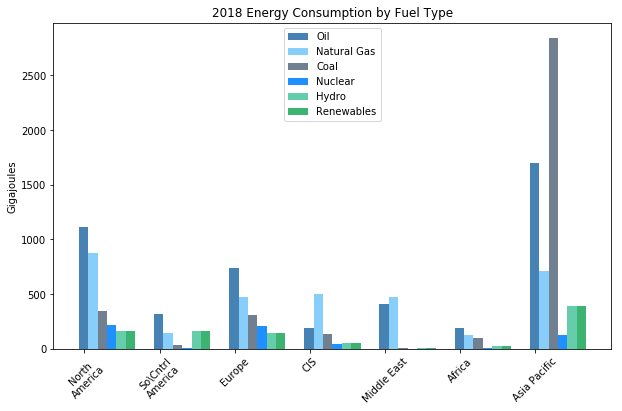

In [323]:
#Create Energy Consumption by Fuel Type grouped bar chart - NOT USED
N = 7
fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.125         # the width of the bars
p1 = ax.bar(ind, oil, width, bottom=0,color="steelblue")
p2 = ax.bar(ind + width, gas, width, bottom=0,color="lightskyblue")
p3 = ax.bar(ind + width*2, coal, width, bottom=0,color="slategray")
p4 = ax.bar(ind + width*3, nuclear, width, bottom=0,color="dodgerblue")
p5 = ax.bar(ind + width*4, hydro, width, bottom=0,color="mediumaquamarine")
p6 = ax.bar(ind + width*5, hydro, width, bottom=0,color="mediumseagreen")


ax.set_title('2018 Energy Consumption by Fuel Type')
ax.set_xticks(ind + width / 10)
ax.set_xticklabels(('North\nAmerica', 'So\Cntrl\nAmerica', 'Europe', 'CIS', 'Middle East','Africa', 'Asia Pacific'),rotation=45)

ax.legend((p1[0], p2[0],p3[0], p4[0],p5[0],p6[0]), ('Oil', 'Natural Gas','Coal','Nuclear','Hydro','Renewables'),loc="upper center")
ax.set_ylabel("Gigajoules")
plt.tight_layout
print_fig = fig
print_fig.set_size_inches(10,6)
print_fig.savefig('output/energy_by_fueltype.png')

In [326]:
#Calculate Total and Percent Consumption of Green/Non-Green fuel
green_df["Non-Green Sources"] = oil + gas + coal + nuclear
green_df["Green Sources"] = hydro + renewable
green_df["Total"] = green_df["Non-Green Sources"] + green_df["Green Sources"]
green_df["% Non-Green"] = round(((green_df["Non-Green Sources"]/green_df["Total"])*100),1)
green_df["% Green"] = round(((green_df["Green Sources"]/green_df["Total"])*100),1)
#green_df

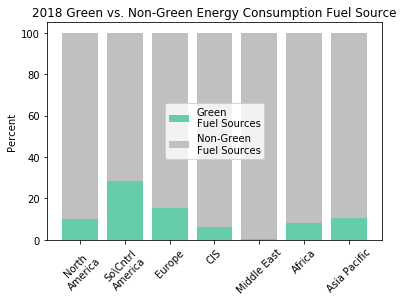

In [331]:
#Create Energy Consumption by Fuel Type grouped bar chart
plt.bar(green_df["Region"],green_df["% Green"], color="mediumaquamarine",bottom=0,label="Green\nFuel Sources")
plt.bar(green_df["Region"],green_df["% Non-Green"],color="silver",bottom=green_df["% Green"],label="Non-Green\nFuel Sources")
plt.xticks(np.arange(7),('North\nAmerica', 'So\Cntrl\nAmerica', 'Europe', 'CIS', 'Middle East','Africa', 'Asia Pacific'),rotation=45)
plt.ylabel("Percent")
plt.legend(loc="center")
plt.title('2018 Green vs. Non-Green Energy Consumption Fuel Source')
plt.tight_layout
plt.savefig("output/green_vs_nongreen.png",bbox_inches = 'tight')
